## Figure S2
The bar graph shows the differential use of metabolic pathways, scaled by oxygen consumption.

In [2]:
import pandas as pd
import numpy as np
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import load_matlab_model, write_sbml_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
import requests
import time

/tmp/ipykernel_454247/1822672552.py:12: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [3]:
#Here we load the resulting files with the fluxes from Pheflux as a dictionary
folder="/home/bguzman/jupyter/UI/YMC/results/"
T1= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T2= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T2_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T3= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T3_Solve_Succeeded.csv" ,sep="\t",index_col=0,names=["flux"],skiprows=1)
T4= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T4_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T5= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T5_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T6= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T6_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T7= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T7_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T8= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T8_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T9= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T9_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T10= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T10_mean.csv",sep="\,",index_col=0,names=["flux"],skiprows=1)
T11= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T12_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T12= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T13_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T13= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T14_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T14= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T15_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T15= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T16_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)

#Fluxes scaled by oxygen consumption (Points 10 and 11 were averaged)
vo2Known=[[-2.92082724],
       [-4.47803413],
       [-6.0975081 ],
       [-4.67754614],
       [-5.69895802],
       [-5.22806652],
       [-5.05388932],
       [-5.03964254],
       [-5.23731737],
       [-4.490514515],
       [-1.25370044],
       [-2.20508958],
       [-2.97076367],
       [-2.76457827],
       [-2.47247774]]
allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15]:
    index += 1
    allFluxes["T"+str(1)]=i["flux"]*(vo2Known[0]/T1.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(2)]=i["flux"]*(vo2Known[1]/T2.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(3)]=i["flux"]*(vo2Known[2]/T3.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(4)]=i["flux"]*(vo2Known[3]/T4.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(5)]=i["flux"]*(vo2Known[4]/T5.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(6)]=i["flux"]*(vo2Known[5]/T6.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(7)]=i["flux"]*(vo2Known[6]/T7.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(8)]=i["flux"]*(vo2Known[7]/T8.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(9)]=i["flux"]*(vo2Known[8]/T9.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(10)]=i["flux"]*(vo2Known[9]/T10.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(11)]=i["flux"]*(vo2Known[10]/T11.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(12)]=i["flux"]*(vo2Known[11]/T12.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(13)]=i["flux"]*(vo2Known[12]/T13.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(14)]=i["flux"]*(vo2Known[13]/T14.loc["R_EX_o2_e"][0])
    allFluxes["T"+str(15)]=i["flux"]*(vo2Known[14]/T15.loc["R_EX_o2_e"][0])
    

/tmp/ipykernel_454247/2409941768.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  T10= pd.read_csv(folder+"predictions_feb22_gly_tre_o2/T10_mean.csv",sep="\,",index_col=0,names=["flux"],skiprows=1)


In [4]:
allFluxes.loc["R_EX_glc__D_e"]

T1    -24.310865
T2    -28.041795
T3    -31.200794
T4    -28.647255
T5    -29.381980
T6    -28.221632
T7    -27.523005
T8    -28.941715
T9    -26.758900
T10   -27.498778
T11   -33.953625
T12   -23.937900
T13   -22.942495
T14   -22.294568
T15   -23.804986
Name: R_EX_glc__D_e, dtype: float64

In [5]:
 #S. cerevisiae GEM from BiggModels
model= cobra.io.read_sbml_model("/home/bguzman/jupyter/UI/YMC/gems/iMM904.xml")

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [6]:
##############################################################################
## Load json file and iMM904 GEM
import cobra
json_annotations = requests.get('http://bigg.ucsd.edu/static/models/iMM904.json').json()
model = cobra.io.read_sbml_model("/home/bguzman/jupyter/UI/YMC/gems/iMM904.xml")

In [7]:
##############################################################################
## extract subsystem for each reaction
subsystems_list = set()
for i in range(len(model.reactions)):
    annotation = json_annotations['reactions'][i]
    subsystems_list.add(annotation['subsystem'])

##############################################################################
## assigns the reactions to their respective subsystem
subsystems = {}
for subsyst in subsystems_list:
    subsystems[subsyst] = set()
    for i in range(len(model.reactions)):
        subsystem = json_annotations['reactions'][i]['subsystem']
        if subsyst == subsystem:
            ID = 'R_'+json_annotations['reactions'][i]['id']
            subsystems[subsyst].add(ID)

In [8]:
#df normalization
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

#NAN -> 0
allFluxes_norm=allFluxes_norm.fillna(0)


In [9]:
#Integrate pathways and reactions values
results=allFluxes
#time1 = time.time()

pathways = pd.DataFrame(columns=results.columns, index=subsystems.keys())
for i, pathway in enumerate(pathways.index):
    print(pathway, "\t(",i+1,"/",len(pathways.index),")")
    for j, sample in enumerate(pathways.columns):
#         print (" - ",sample, "\t[",j+1,"/",len(pathways.columns),"]", "\t(",i+1,"/",len(pathways.index),")")
        v_path = []
        for rxn in subsystems[pathway]:
#            print(rxn)
            v = abs(results[sample].loc[rxn])
            v_path.append(v)
#       Pathways mean            
        v_mean_path = np.sum(v_path)/len(v_path)
        
        pathways[sample].loc[pathway] = v_mean_path
        

S_Transport__Peroxisomal 	( 1 / 60 )
S_Porphyrin_and_Chlorophyll_Metabolism 	( 2 / 60 )
Extracellular exchange 	( 3 / 60 )
S_Transport__Endoplasmic_Reticular 	( 4 / 60 )
S_NAD_Biosynthesis 	( 5 / 60 )
S_Fructose_and_Mannose_Metabolism 	( 6 / 60 )
S_Oxidative_Phosphorylation 	( 7 / 60 )
S_Glycerolipid_Metabolism 	( 8 / 60 )
S_Arabinose_Metabolism 	( 9 / 60 )
S_Transport__Nuclear 	( 10 / 60 )
S_Pyridoxine_Metabolism 	( 11 / 60 )
S_Fatty_Acid_Degradation 	( 12 / 60 )
S_GlycolysisGluconeogenesis 	( 13 / 60 )
S_Threonine_and_Lysine_Metabolism 	( 14 / 60 )
S_Transport__Golgi_Apparatus 	( 15 / 60 )
S_Citric_Acid_Cycle 	( 16 / 60 )
S_Glycoprotein_Metabolism 	( 17 / 60 )
S_Methionine_Metabolism 	( 18 / 60 )
S_Complex_Alcohol_Metabolism 	( 19 / 60 )
S_tRNA_charging 	( 20 / 60 )
S_Quinone_Biosynthesis 	( 21 / 60 )
S_Other_Amino_Acid_Metabolism 	( 22 / 60 )
S_Methane_Metabolism 	( 23 / 60 )
S_Taurine_Metabolism 	( 24 / 60 )
S_Transport__Extracellular 	( 25 / 60 )
S_Glutamate_metabolism 	( 26 / 60 

In [10]:
pathways

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15
S_Transport__Peroxisomal,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000003,0.000002,0.000002,0.000003
S_Porphyrin_and_Chlorophyll_Metabolism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extracellular exchange,1.414539,1.631625,1.815433,1.666854,1.709605,1.642089,1.601439,1.683988,1.55698,1.60003,1.975608,1.392838,1.33492,1.29722,1.385105
S_Transport__Endoplasmic_Reticular,0.011549,0.013321,0.014822,0.013609,0.013958,0.013406,0.013075,0.013748,0.012712,0.013063,0.016129,0.011371,0.010899,0.010591,0.011308
S_NAD_Biosynthesis,0.145005,0.167259,0.186101,0.17087,0.175252,0.168331,0.164164,0.172626,0.159607,0.16402,0.20252,0.14278,0.136843,0.132979,0.141988
S_Fructose_and_Mannose_Metabolism,0.257515,0.297035,0.330497,0.303448,0.311231,0.29894,0.291539,0.306567,0.283445,0.291283,0.359656,0.253564,0.24302,0.236157,0.252156
S_Oxidative_Phosphorylation,4.323071,4.986522,5.54827,5.094188,5.22484,5.018501,4.894268,5.14655,4.758391,4.88996,6.037791,4.256748,4.079741,3.964523,4.233113
S_Glycerolipid_Metabolism,4.621438,5.330679,5.931197,5.445775,5.585444,5.364865,5.232058,5.501751,5.086803,5.227452,6.454503,4.550538,4.361314,4.238144,4.525271
S_Arabinose_Metabolism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S_Transport__Nuclear,0.320858,0.370099,0.411792,0.37809,0.387787,0.372473,0.363252,0.381976,0.353167,0.362932,0.448124,0.315935,0.302798,0.294246,0.314181


In [11]:
#Means
reactions=list(pathways.index)
mean_RC=list((pathways["T1"] + pathways["T2"] + pathways["T12"] + pathways["T13"] + pathways["T14"] + pathways["T15"])/6)
mean_OX=list((pathways["T3"] + pathways["T4"] + pathways["T5"])/3)
mean_RB=list((pathways["T6"] + pathways["T7"] + pathways["T8"] + pathways["T9"] + pathways["T10"] + pathways["T11"])/6)
mean_pathways= pd.DataFrame(list(zip(reactions,mean_RC,mean_OX,mean_RB)), columns = ['Reactions','RC flux','OX flux','RB flux'])
mean_pathways

,Reactions,RC flux,OX flux,RB flux
0,S_Transport__Peroxisomal,2.579324e-06,3.167261e-06,3.068541e-06
1,S_Porphyrin_and_Chlorophyll_Metabolism,1.301638e-08,1.598336e-08,1.548518e-08
2,Extracellular exchange,1.409375e+00,1.730631e+00,1.676689e+00
3,S_Transport__Endoplasmic_Reticular,1.150649e-02,1.412930e-02,1.368891e-02
4,S_NAD_Biosynthesis,1.444755e-01,1.774076e-01,1.718780e-01
5,S_Fructose_and_Mannose_Metabolism,2.565743e-01,3.150584e-01,3.052384e-01
6,S_Oxidative_Phosphorylation,4.307286e+00,5.289099e+00,5.124243e+00
7,S_Glycerolipid_Metabolism,4.604564e+00,5.654139e+00,5.477905e+00
8,S_Arabinose_Metabolism,5.810677e-08,7.135176e-08,6.912781e-08
9,S_Transport__Nuclear,3.196863e-01,3.925563e-01,3.803207e-01


In [12]:
#Abbreviation for reactions
GG=[] #'S_GlycolysisGluconeogenesis'
OXP=[] #'S_Oxidative_Phosphorylation'
PM=[] #'S_Pyruvate_Metabolism'
GM=[] #'S_Glutamate_metabolism'
AAM=[] #'S_Alanine_and_Aspartate_Metabolism'
GLM=[] #'S_Fatty_Acid__Biosynthesis'
TCA=[] #'S_Citric_Acid_Cycle'
TM=[] #'S_Transport__Mitochondrial'
NAD=[] #'S_NAD_Biosynthesis'
PP=[] #'S_Pentose_Phosphate_Pathway'

list_path=["GG","OXP","PM","AAM","GM","FAB","TCA","NAD","PP","TM"]

i=0
j=0
for i in range(len(mean_pathways)):
    for j in pathways.index:
        if j=="S_GlycolysisGluconeogenesis":
            GG.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Oxidative_Phosphorylation":
            OXP.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Pyruvate_Metabolism":
            PM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Alanine_and_Aspartate_Metabolism":
            AAM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Glutamate_metabolism":
            GM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Glycerolipid_Metabolism":
            GLM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Citric_Acid_Cycle":
            TCA.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_NAD_Biosynthesis":
            NAD.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Pentose_Phosphate_Pathway":
            PP.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Transport__Mitochondrial":
            TM.append(list(mean_pathways.iloc[i,0:]))
        else:
            print("Loading")
        i+=1
            
    break


Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading


In [13]:
OXP

[['S_Oxidative_Phosphorylation',
  4.307286162759019,
  5.289098888551808,
  5.124243480761426]]

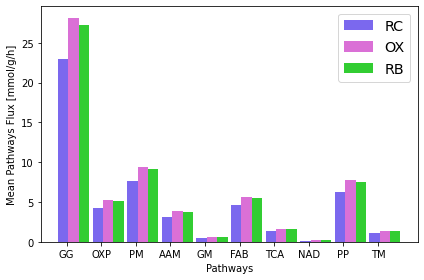

In [14]:
#PLOT
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

RC_means = [GG[0][1], OXP[0][1], PM[0][1], AAM[0][1], GM[0][1], GLM[0][1], TCA[0][1], NAD[0][1], PP[0][1], TM[0][1]]
OX_means = [GG[0][2], OXP[0][2], PM[0][2], AAM[0][2], GM[0][2], GLM[0][2], TCA[0][2], NAD[0][2], PP[0][2], TM[0][2]]
RB_means = [GG[0][3], OXP[0][3], PM[0][3], AAM[0][3], GM[0][3], GLM[0][3], TCA[0][3], NAD[0][3], PP[0][3], TM[0][3]]

x = np.arange(len(list_path))
width = 0.30

fig, ax = plt.subplots()

#plot bars RC
rects1 = ax.bar(x - width/3, RC_means, width, label='RC',color='mediumslateblue')
#plot bars OX
rects2 = ax.bar(x + 0.2, OX_means, width, label='OX',color='orchid')
#plot bars RB
rects3 = ax.bar(x + 0.5, RB_means, width, label='RB',color='limegreen')

#Add labels
ax.set_ylabel('Mean Pathways Flux [mmol/g/h]')
ax.set_xlabel('Pathways')
ax.set_xticks(x)
ax.set_xticklabels(list_path)
ax.legend()

        
#Add legends
plt.legend(fontsize="x-large")
fig.tight_layout()
        